In [20]:
import pandas as pd 
import json
import numpy as np
from bertopic import BERTopic


In [21]:
with open("/Users/charliemasters/Desktop/xapien_compliance_riskmodel/data/NiramaxTextData.json", "r") as f: 
    
    file = json.load(f)

In [22]:
df = pd.DataFrame(file['SearchResults'])
df.columns = df.columns.str.lower()


In [23]:
df['full_text'] = df.title + df.snippet
df = df.drop_duplicates(subset= "full_text")


In [50]:
from bertopic import BERTopic
import openai
from bertopic.representation import OpenAI
from sentence_transformers import SentenceTransformer
unique_titles = df.title.drop_duplicates().values 
representation_model = OpenAI(model="gpt-3.5-turbo", chat=True)

topic_model = BERTopic(embedding_model = SentenceTransformer('all-MiniLM-L6-v2'))
topics, probs = topic_model.fit_transform(unique_titles)

topic_model.get_topic_info()


,Topic,Count,Name,Representation,Representative_Docs
0,-1,21,-1_niramax_products_rubber_find,"[niramax, products, rubber, find, killer, limi...",[NIRAMAX RUBBER PRODUCTS LIMITED people - Find...
1,0,30,0_niramax_limited_group_and,"[niramax, limited, group, and, update, find, c...",[NIRAMAX GROUP LIMITED filing history - Find a...
2,1,22,1_boss_murder_hartlepool_elliott,"[boss, murder, hartlepool, elliott, jailed, ne...",[Businessman jailed over death of drug addict ...
3,2,15,2_waste_fraud_tax_and,"[waste, fraud, tax, and, landfill, firm, indus...",[Waste Industry: Criminality and Regulation - ...


In [35]:
reps = topic_model.get_representative_docs()


In [41]:
reps[-1]

['NIRAMAX RUBBER PRODUCTS LIMITED people - Find and update ...',
 'NIRAMAX RUBBER PRODUCTS LIMITED overview - Find and ...',
 'NIRAMAX RUBBER PRODUCTS LIMITED charges - Find and ...']

In [42]:
def map_representative_docs(rep_docs, key): 
    return rep_docs[int(key)]

In [49]:
topic_df["Topic"].map(reps).tolist()


[['NIRAMAX GROUP LIMITED filing history - Find and update ...',
  'NIRAMAX HOLDINGS LIMITED charges - Find and update company ...',
  'NIRAMAX GROUP LIMITED charges - Find and update company ...'],
 ['NIRAMAX GROUP LIMITED filing history - Find and update ...',
  'NIRAMAX HOLDINGS LIMITED charges - Find and update company ...',
  'NIRAMAX GROUP LIMITED charges - Find and update company ...'],
 ['NIRAMAX RUBBER PRODUCTS LIMITED people - Find and update ...',
  'NIRAMAX RUBBER PRODUCTS LIMITED overview - Find and ...',
  'NIRAMAX RUBBER PRODUCTS LIMITED charges - Find and ...'],
 ['NIRAMAX GROUP LIMITED filing history - Find and update ...',
  'NIRAMAX HOLDINGS LIMITED charges - Find and update company ...',
  'NIRAMAX GROUP LIMITED charges - Find and update company ...'],
 ['NIRAMAX GROUP LIMITED filing history - Find and update ...',
  'NIRAMAX HOLDINGS LIMITED charges - Find and update company ...',
  'NIRAMAX GROUP LIMITED charges - Find and update company ...'],
 ['NIRAMAX GROUP LIM

In [32]:
topic_df = topic_model.get_document_info(unique_titles)



In [38]:
topic_df



,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,Zurich Insurance PLC v Niramax Group Limited [...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,0.894246,False
1,Non-disclosure to insurers (pre-Insurance Act ...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,0.632915,False
2,Recycling firm Niramax fined Â£16000 over envi...,-1,-1_niramax_products_rubber_firm,"[niramax, products, rubber, firm, teesside, ha...",[NIRAMAX RUBBER PRODUCTS LIMITED people - Find...,niramax - products - rubber - firm - teesside ...,0.000000,False
3,Contact us - Niramax Group Limited,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,1.000000,False
4,NIRAMAX ENERGY LIMITED overview - Find and upd...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,1.000000,False
...,...,...,...,...,...,...,...,...
83,NIRAMAX HOLDINGS LIMITED more information - Fi...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,1.000000,False
84,NIRAMAX GROUP LIMITED filing history - Find an...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,0.985919,True
85,NIRAMAX RUBBER PRODUCTS LIMITED charges - Find...,-1,-1_niramax_products_rubber_firm,"[niramax, products, rubber, firm, teesside, ha...",[NIRAMAX RUBBER PRODUCTS LIMITED people - Find...,niramax - products - rubber - firm - teesside ...,0.000000,True
86,NIRAMAX RUBBER PRODUCTS LIMITED more informati...,-1,-1_niramax_products_rubber_firm,"[niramax, products, rubber, firm, teesside, ha...",[NIRAMAX RUBBER PRODUCTS LIMITED people - Find...,niramax - products - rubber - firm - teesside ...,0.000000,False


In [39]:
topic_df['Topic'].map(reps)


0     [NIRAMAX GROUP LIMITED filing history - Find a...
1     [NIRAMAX GROUP LIMITED filing history - Find a...
2     [NIRAMAX RUBBER PRODUCTS LIMITED people - Find...
3     [NIRAMAX GROUP LIMITED filing history - Find a...
4     [NIRAMAX GROUP LIMITED filing history - Find a...
                            ...                        
83    [NIRAMAX GROUP LIMITED filing history - Find a...
84    [NIRAMAX GROUP LIMITED filing history - Find a...
85    [NIRAMAX RUBBER PRODUCTS LIMITED people - Find...
86    [NIRAMAX RUBBER PRODUCTS LIMITED people - Find...
87    [NIRAMAX GROUP LIMITED filing history - Find a...
Name: Topic, Length: 88, dtype: object

In [27]:
topic_df = topic_model.get_document_info(unique_titles)
topic_df.columns = topic_df.columns.str.lower()


In [28]:
#Merge 
merged_df = pd.merge(df, topic_df, left_on=['title'], right_on=['document'], how='inner')

# Drop the redundant 'Document' column from the merged DataFrame
merged_df = merged_df.drop('document', axis=1)


In [29]:
merged_df

,title,snippet,date,sourceids,full_text,topic,name,representation,representative_docs,top_n_words,probability,representative_document
0,Zurich Insurance PLC v Niramax Group Limited [...,5 May 2021 - ... Chambers Social Responsibilit...,"{'Year': 2021, 'Month': 5, 'MonthShort': 'May'...","[d59499b9-4d75-4aec-9e85-fecccb89b476, 97d7dbc...",Zurich Insurance PLC v Niramax Group Limited [...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,0.894246,False
1,Zurich Insurance PLC v Niramax Group Limited [...,"4 May 2021 - The Respondent, Niramax, was in t...","{'Year': 2021, 'Month': 5, 'MonthShort': 'May'...","[4eb3a73b-1feb-4c84-a5fc-0a15d9df8410, e4c060e...",Zurich Insurance PLC v Niramax Group Limited [...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,0.894246,False
2,Non-disclosure to insurers (pre-Insurance Act ...,"29 Jul 2021 - In December 2015, waste collecti...","{'Year': 2021, 'Month': 7, 'MonthShort': 'Jul'...","[1afc8049-8272-425f-aea1-23d0dda39eb3, c43a9f9...",Non-disclosure to insurers (pre-Insurance Act ...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,0.632915,False
3,Recycling firm Niramax fined Â£16000 over envi...,15 Jan 2018 - Niramax Group Ltd pleaded guilty...,"{'Year': 2018, 'Month': 1, 'MonthShort': 'Jan'...","[be8451e5-537a-4088-8763-2dfbd7a77ad5, 5e7bf3c...",Recycling firm Niramax fined Â£16000 over envi...,-1,-1_niramax_products_rubber_firm,"[niramax, products, rubber, firm, teesside, ha...",[NIRAMAX RUBBER PRODUCTS LIMITED people - Find...,niramax - products - rubber - firm - teesside ...,0.000000,False
4,Contact us - Niramax Group Limited,Niramax Group Limited John Shadforth House Tho...,None,"[11c72183-4331-44e5-ad37-5d93ee6c67ea, 9d1c254...",Contact us - Niramax Group LimitedNiramax Grou...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,1.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
90,NIRAMAX HOLDINGS LIMITED more information - Fi...,NIRAMAX HOLDINGS LIMITED - Free company inform...,None,[7e3564a2-260d-495a-ad56-d02d20e37e2a],NIRAMAX HOLDINGS LIMITED more information - Fi...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,1.000000,False
91,NIRAMAX GROUP LIMITED filing history - Find an...,NIRAMAX GROUP LIMITED - Free company informati...,None,[6faef2d8-caba-4679-850e-8dcccec6be2e],NIRAMAX GROUP LIMITED filing history - Find an...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,0.985919,True
92,NIRAMAX RUBBER PRODUCTS LIMITED charges - Find...,... NIRAMAX RUBBER PRODUCTS LIMITED - Free co...,"{'Year': 2019, 'Month': 12, 'MonthShort': 'Dec...",[0d3e07fe-a5fc-4547-aab1-556624ee7203],NIRAMAX RUBBER PRODUCTS LIMITED charges - Find...,-1,-1_niramax_products_rubber_firm,"[niramax, products, rubber, firm, teesside, ha...",[NIRAMAX RUBBER PRODUCTS LIMITED people - Find...,niramax - products - rubber - firm - teesside ...,0.000000,True
93,NIRAMAX RUBBER PRODUCTS LIMITED more informati...,NIRAMAX RUBBER PRODUCTS LIMITED - Free company...,None,[098006b4-6e71-4182-adcb-eba1d2467804],NIRAMAX RUBBER PRODUCTS LIMITED more informati...,-1,-1_niramax_products_rubber_firm,"[niramax, products, rubber, firm, teesside, ha...",[NIRAMAX RUBBER PRODUCTS LIMITED people - Find...,niramax - pro

In [30]:
merged_df = merged_df.drop_duplicates(subset= "full_text")
merged_df.head(1)

,title,snippet,date,sourceids,full_text,topic,name,representation,representative_docs,top_n_words,probability,representative_document
0,Zurich Insurance PLC v Niramax Group Limited [...,5 May 2021 - ... Chambers Social Responsibilit...,"{'Year': 2021, 'Month': 5, 'MonthShort': 'May'...","[d59499b9-4d75-4aec-9e85-fecccb89b476, 97d7dbc...",Zurich Insurance PLC v Niramax Group Limited [...,0,0_niramax_limited_group_company,"[niramax, limited, group, company, and, update...",[NIRAMAX GROUP LIMITED filing history - Find a...,niramax - limited - group - company - and - up...,0.894246,False


In [31]:
new_df[new_df['topic'] == 2].sort_values(by = "probability")

NameError: name 'new_df' is not defined

In [ ]:
trial = new_df[new_df['topic'] == 2]
topic_model = BERTopic(embedding_model = 'all-MiniLM-L6-v2')
topics, probs = topic_model.fit_transform(trial['full_text'].tolist(), y = trial['label_temporal'])

topic_model.get_topic_info()

: 

In [ ]:
import tqdm 
tqdm.tqdm.pandas()

: 

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import date2num
from sklearn.cluster import DBSCAN
import pandas as pd

def plot_dates(dates):
    converted_dates = []

    for date in dates:
        date_str = f"{date['Year']}-{date['Month']}-{date['Day']}"
        converted_date = datetime.strptime(date_str, "%Y-%m-%d")
        converted_dates.append(converted_date)

    # Perform temporal clustering using DBSCAN
    clustering = DBSCAN(eps=365/2, min_samples=5).fit(date2num(converted_dates).reshape(-1, 1))
    # Create a mapping of dates to cluster labels
    date_clusters = []
    for i, label in enumerate(clustering.labels_):
        date_clusters.append((dates[i], label))
        

    df = pd.DataFrame(date_clusters, columns=["date", "label_temporal"])

    # Plotting the converted dates with highlighted clusters
    plt.figure(figsize=(8, 6))
    for label in df['label_temporal'].unique():
        cluster_dates = df[df['label_temporal'] == label]['date']
        cluster_converted_dates = [datetime.strptime(f"{date['Year']}-{date['Month']}-{date['Day']}", "%Y-%m-%d") for
                                    date in cluster_dates]
        plt.scatter(cluster_converted_dates, range(len(cluster_converted_dates)), marker='o', label=f'Cluster {label}')

    plt.xlabel('Date')
    plt.ylabel ("")
    plt.title('Dates on a Number Line')
    plt.legend()
    plt.show()

    return df
    



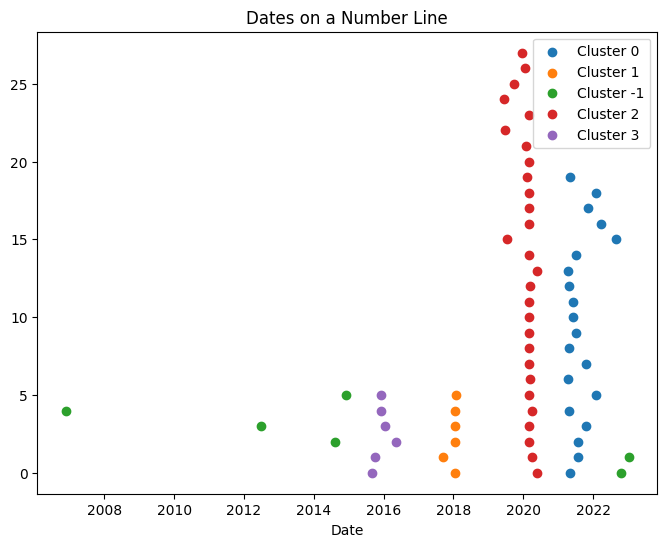

In [ ]:
dates = [x for x in df['date'].values.tolist() if x!= None]
density_threshold = 1  # Adjust this value based on your data and requirements

temporal_df = plot_dates(dates)




In [ ]:
merged_df

: 

In [ ]:
def merge_datetime_dfs(df1 : pd.DataFrame, df2 : pd.DataFrame): 
    df1['date_str'] = df1['date'].apply(lambda x: str(x))
    df2['date_str'] = df2['date'].apply(lambda x: str(x))

    # Perform the merge based on the 'date_str' column
    merged_df = pd.merge(df1, df2, on='date_str')
    merged_df = merged_df.drop_duplicates(subset= "full_text")

    
    return merged_df

: 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')


: 

In [ ]:
new_df

: 

In [ ]:
new_df[new_df['topic'] == 1]['full_text'].unique()

: 

In [ ]:
for i in range(3):
    unique_docs = new_df[new_df['topic'] == i]['snippet'].tolist()
    title_docs = new_df[new_df['topic'] == i]['representative_docs'].tolist()[0]
    print(title_docs, "\n\n\n")

: 

In [ ]:
title_docs

: 

In [ ]:
from typing import List
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def find_duplicates(titles: List[str], title_docs : List[str]):
    print(title_docs, "\n")
    embeddings = model.encode(titles)
    title_embedding = model.encode(title_docs, )
    similarity_matrix = cosine_similarity(embeddings, np.average(title_embedding,axis = 0).reshape(1,-1))
    for i, title in enumerate(titles): 
        print(similarity_matrix[i], title)

find_duplicates(new_df[new_df['topic'] == 2]['full_text'].tolist(), title_docs)

: 

In [ ]:
from typing import List

: 

In [ ]:
from typing import List
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def find_duplicates(titles: List[str]):
    embeddings = model.encode(titles)

    similarity_matrix = cosine_similarity(embeddings)
    np.fill_diagonal(similarity_matrix, 0)  # Set diagonal elements to 0

    lower_triangle = np.tril(similarity_matrix)  # Get lower triangle of the similarity matrix
    print(lower_triangle.shape)
    duplicate_indices = np.where(lower_triangle > 0.6)
    
    print(duplicate_indices)

find_duplicates(new_df[new_df['topic'] == 1]['full_text'].tolist())



: 

In [ ]:
find_duplicates(embeddings)

: 

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named df with columns 'Date' and 'label_temporal'
n = 10  # Minimum number of occurrences for a value to be retained

# Count the occurrences of each value in 'label_temporal' column
value_counts = df['label_temporal'].value_counts()

# Get the values that appear at least 'n' times
valid_values = value_counts[value_counts >= n].index

# Filter the DataFrame based on the valid values
filtered_df = df[df['label_temporal'].isin(valid_values)]

# Print the filtered DataFrame
print(filtered_df)


: 

In [ ]:
temporal_df['DateStr'] = temporal_df['Date'].apply(lambda x: str(x)) 
merged_df['DateStr'] = merged_df['Date'].apply(lambda x: str(x))



: 

In [ ]:
merged_df

: 

In [ ]:
temporal_df

: 

In [ ]:
x = pd.merge(temporal_df, merged_df, on='DateStr')


: 

In [ ]:
x['full_text'] = x['Title'] + x['Snippet']


# Drop duplicates based on a specific column

x.drop_duplicates(subset='full_text')

: 

In [ ]:
topic_model = BERTopic(verbose=True).fit(x.full_text, y=x.label_temporal)


: 

In [ ]:
for i in rangetopic_model.get_representative_docs()

: 

In [ ]:
label_df = pd.read_csv("peudolabels.csv")

: 

In [ ]:
label_df[np.logical_or(label_df['label'] == "0",label_df['label'] =="1")]

: 

In [ ]:
merged_df = pd.merge(merged_df, temporal_df, left_on=['Date'], right_on=['date'], )
# Drop the redundant 'Document' column from the merged DataFrame
merged_df

: 

In [ ]:
murder_data = merged_df[merged_df.Topic == 2]['Title'].unique(
).tolist()

: 

In [ ]:
murder_data

: 

In [ ]:
topics

: 

In [ ]:
import spacy

# Load the pre-trained English NER model from spaCy
nlp = spacy.load("en_core_web_sm")

# Example news data
news_data = new_df.full_text.tolist()

triplets = []

# Process the sentence with spaCy
for sentence in news_data:
    doc = nlp(sentence)

    # Extract dependency triplets involving specified entity types
    for token in doc:
        if token.dep_ == "nsubj" or token.dep_ == "dobj":
            if token.ent_type_ in ["PERSON", "NORP", "FAC", "ORG", "EVENT", "LAW"]:
                subject = token.head.text
                relation = token.dep_
                object_ = token.text
                triplets.append((subject, relation, object_))

# Print the extracted dependency triplets
for triplet in triplets:
    subject, relation, object_ = triplet
    print(f"{subject} --{relation}--> {object_}")


: 

In [ ]:
import networkx as nx

# Create an empty directed graph
graph = nx.DiGraph()

# Example dependency triplets

# Add nodes and edges to the graph
for subject, relation, object_ in triplets:
    graph.add_edge(subject, object_, label=relation)

# Print the nodes and edges of the graph
print("Nodes:", graph.nodes())
print("Edges:")
for source, target, data in graph.edges(data=True):
    print(f"{source} --{data['label']}--> {target}")


: 

In [ ]:
reachable_nodes

: 

In [ ]:
plt.figure(figsize=(18,12))
# Create a layout for the graph


pos = nx.spring_layout(graph)

# Draw the nodes
nx.draw_networkx_nodes(graph, pos, node_size=500, node_color="lightblue")

# Draw the edges
nx.draw_networkx_edges(graph, pos, arrows=True, edge_color="gray")

# Draw the labels
nx.draw_networkx_labels(graph, pos, font_size=12, font_color="black")

# Draw the edge labels
edge_labels = nx.get_edge_attributes(graph, "label")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

# Set plot properties
plt.title("Dependency Graph")
plt.axis("off")

# Display the plot
plt.show()

: 